 * Student name: Charles Ondieki Otwori
 * Student pace: Part-time
 * Scheduled project review date/time: March , 2025
 * Instructor name:
 * Github link 

# Predicting HIV Risk and Identifying Key Infection Drivers among Adolescent Girls and Young Women in Kenya (2018–2022)
## Business Understanding 
### Project Value: 
This project provides critical insights to combat the HIV epidemic among adolescent girls by analyzing five years of program data. Adolescent girls and young women (AGYW) face disproportionately high HIV risk  in sub-Saharan Africa, HIV prevalence in young women is over three times higher than in their male peers​ unaids.org. By understanding how HIV incidence has changed from 2018 to 2022 and what factors drive new infections, stakeholders can sharpen their strategies to protect this vulnerable group. The analysis will ensure resources (e.g. prevention programs, funding) are directed to where they have the greatest impact, ultimately moving closer to the goal of an AIDS-free generation of girls.

### Real-World Problem: 
The  Adolescent girls and young women(AGYW) HIV prevention program was launched to reduce new HIV infections in AGYW aged 15 to 25 years  who significantly account for new HIV cases. Globally, women and girls comprised 44% of new HIV infections in 2023 unaids.org .This project addresses the  high HIV incidence in adolescent girls by identifying why these infections occur (key risk factors) and who is most at risk (through predictive modeling). Solving this problem means fewer new HIV cases, which is essential for achieving epidemic control targets.

import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [84]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import summarytools as st
from cycler import cycler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier 
from sklearn.neural_network import MLPClassifier
from scipy.stats import zscore
from scipy.stats import chi2_contingency

In [85]:
# Set a consistent style for the plots
plt.style.use('ggplot')
sns.set(style='whitegrid')

# Defining brand colors 
primary_color = '#032685'    # primary brand 
secondary_color = '#555555'  # Neutral dark gray for secondary data
tertiary_color = '#888888'   # Neutral medium gray for additional series
quaternary_color = '#CCCCCC' # Neutral light gray for further series


# Update rcParams to enforce uniform aesthetics across all plots, including bold titles
plt.rcParams.update({
    'figure.figsize': (8, 6),         # Default figure size
    'axes.titlesize': 14,             # Title font size
    'axes.titleweight': 'bold',       # Make the title bold
    'axes.labelsize': 12,             # Axis label font size
    'axes.labelweight': 'bold',       # Axis label font weight
    'grid.linestyle': '--',           # Grid line style
    'grid.alpha': 0.7,                # Grid transparency
    'font.size': 10,                  # Base font size
    'xtick.labelsize': 10,            # X tick label size
    'ytick.labelsize': 10,            # Y tick label size
    'legend.fontsize': 10,            # Legend font size
    'axes.prop_cycle': cycler(color=[primary_color, secondary_color, tertiary_color, quaternary_color]),
    'axes.facecolor': '#ffffff',           # Axes background (white for minimalism)
    'figure.facecolor': '#ffffff'          # Figure background (white for minimalism)
})
# ignore warning for cleaner code 
import warnings 
warnings.filterwarnings('ignore')

In [86]:
AGYW_prev_data =pd.read_csv("\Capstone project\dreams_raw_dataset\dreams_raw_dataset.csv")
AGYW_prev_data.head(10)

,date_of_birth,date_of_enrollment,county,head_of_household,head_of_household_other,age_of_household_head,father_alive,mother_alive,are_both_parents_alive,is_one_parent_alive,...,intervention_name,intervention_date,result,bio_medical,social_protection,behavioral,post_gbv_care,other_interventions,exit_age,exit_reason_other
0,9/16/2004,2/22/2020,Nairobi,Mother,NaN,58.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),8/8/2020,Negative,1,1,1,0,0,NaN,NaN
1,8/2/2004,12/18/2019,Nairobi,Father,NaN,43.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,NaN,NaN
2,10/20/2005,3/7/2020,Nairobi,Mother,NaN,41.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,0,0,0,NaN,NaN
3,1/18/2006,3/3/2020,Nairobi,Mother,NaN,45.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,1,0,0,NaN,NaN
4,3/22/2004,12/18/2019,Nairobi,Father,NaN,42.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),4/27/2020,Negative,1,1,1,0,0,NaN,NaN
5,6/30/2003,5/12/2020,Nairobi,Mother,NaN,41.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,1,0,0,NaN,NaN
6,1/23/2005,5/11/2020,Nairobi,Mother,NaN,44.0,Don't Know,Yes,No,No,...,HTS - HTS (Client),8/12/2020,Negative,1,1,1,0,0,NaN,NaN
7,3/10/2005,5/15/2020,Nairobi,Mother,NaN,43.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,0,0,0,NaN,NaN
8,9/1/2004,5/14/2020,Nairobi,Mother,NaN,39.0,No,Yes,No,Yes,...,HTS - HTS (Client),8/12/2020,Negative,1,1,1,0,0,NaN,NaN
9,4/18/2003,3/2/2020,Nairobi,Father,NaN,42.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),8/12/2020,Negative,1,1,1,0,0,NaN,NaN


Exploring the first 10 rows of the data set 


In [87]:
AGYW_prev_data.tail(10)

,date_of_birth,date_of_enrollment,county,head_of_household,head_of_household_other,age_of_household_head,father_alive,mother_alive,are_both_parents_alive,is_one_parent_alive,...,intervention_name,intervention_date,result,bio_medical,social_protection,behavioral,post_gbv_care,other_interventions,exit_age,exit_reason_other
455797,1/27/1998,1/10/2021,Kiambu,Father,NaN,56.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),1/10/2021,Negative,1,1,1,0,0,24.0,NaN
455798,6/9/1998,1/16/2021,Kiambu,Mother,NaN,60.0,No,Yes,No,Yes,...,HTS - HTS (Client),1/16/2021,Negative,1,1,0,1,0,24.0,NaN
455799,9/27/2005,1/20/2021,Kiambu,Mother,NaN,48.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),1/20/2021,Negative,1,1,1,1,0,17.0,NaN
455800,7/23/1997,2/3/2021,Kiambu,Father,NaN,56.0,Yes,No,No,Yes,...,HTS - HTS (Client),2/16/2022,Negative,1,1,1,1,0,25.0,NaN
455801,12/21/1998,2/8/2021,Kiambu,Grandparents,NaN,90.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),3/26/2022,Negative,1,1,1,0,0,23.0,NaN
455802,3/15/2002,3/11/2021,Kiambu,Sibling,NaN,19.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),3/11/2021,Negative,1,1,1,0,0,21.0,NaN
455803,12/13/1999,4/13/2021,Kiambu,Husband/Partner,NaN,21.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),8/22/2022,Negative,1,1,1,0,0,22.0,NaN
455804,1/5/2007,4/21/2021,Kiambu,Grandparents,NaN,54.0,Yes,Yes,Yes,No,...,HTS - HTS (Client),3/18/2022,Negative,1,1,1,0,0,16.0,NaN
455805,10/12/1997,12/2/2020,Kiambu,Grandparents,NaN,71.0,Don't Know,No,No,No,...,HTS - HTS (Client),12/2/2020,Negative,1,1,1,0,0,25.0,NaN
455806,1/15/1997,12/8/2020,Kiambu,NaN,NaN,NaN,NaN,NaN,No,No,...,HTS - HTS (Client),1/12/2022,Negative,1,1,1,1,0,25.0,NaN


Exploring the last 10 rows of the dataset 

In [88]:
AGYW_prev_data.shape

(455807, 42)

The dataset has 455807 rows and 42 columns 

In [89]:
AGYW_prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455807 entries, 0 to 455806
Data columns (total 42 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   date_of_birth                      455807 non-null  object 
 1   date_of_enrollment                 455806 non-null  object 
 2   county                             446551 non-null  object 
 3   head_of_household                  446192 non-null  object 
 4   head_of_household_other            5960 non-null    object 
 5   age_of_household_head              434789 non-null  float64
 6   father_alive                       442399 non-null  object 
 7   mother_alive                       442820 non-null  object 
 8   are_both_parents_alive             455807 non-null  object 
 9   is_one_parent_alive                455807 non-null  object 
 10  parents_alive_status               390403 non-null  object 
 11  no_of_people_in_household          4486

Checking the data types,number of varibles per feature, and memory usage

In [90]:
st.dfSummary(AGYW_prev_data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,date_of_birth[object],1. 1/1/20002. 1/1/20023. 1/1/19984. 1/1/20015. 1/1/19996. 1/1/19967. 1/1/19978. 1/1/19949. 1/1/200310. 1/1/199511. other,"1,011 (0.2%)993 (0.2%)904 (0.2%)883 (0.2%)875 (0.2%)794 (0.2%)756 (0.2%)614 (0.1%)551 (0.1%)509 (0.1%)447,917 (98.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADaElEQVR4nO3cQWoUYRRG0VehiWbSTQhkCbqHLMLFuohehHsIITUwMZNyIIo41lvQnjPK8B9ceDTUl2XbtoHC1d4P4P8hNjJiIyM2MmIjIzYyYiMjNjJiIyM2MlfLsnxcluX93g/h8l3NzIeZebf3Q7h8zigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbmamS8z823vh3D5Fv/FiIozSkZsZKyryFhXkXFGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQMXgh44ySERsZgxcyBi9knFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERkZsZKyryFhXkXFGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i44ySERsZgxcyBi9knFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i44ySERsZ6yoy1lVknFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMs4oGbGRERsZ6yoy1lVknFEyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLWVWSsq8g4o2TERsbghYzBCxlnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMs4omWVmbmbmeu+HcLHetm17mZk53N3dfToej7d7v4jLtK7r07Isn7dtezkcj8fbh4eHl9Pp9Lr3w7gsz8/P78/n8+3j4+P1zLwcZmZOp9Pr/f39153fxmW6+fmHHwhkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDjM/PgXZ+yFcnj+7Oqzr+nQ+n2/nt09B4G9Z1/VpZt5mfBbOv/frs3DrKjJ+IJARGxmxkREbGbGRERsZsZERGxmxkfkOCvhuJDOJMoEAAAAASUVORK5CYII="">",0(0.0%)
2,date_of_enrollment[object],1. 12/9/20202. 12/2/20203. 12/3/20204. 8/23/20175. 12/7/20206. 8/28/20177. 12/10/20208. 12/4/20209. 12/15/202010. 8/25/201711. other,"1,795 (0.4%)1,786 (0.4%)1,723 (0.4%)1,712 (0.4%)1,707 (0.4%)1,691 (0.4%)1,683 (0.4%)1,673 (0.4%)1,671 (0.4%)1,634 (0.4%)438,732 (96.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADfUlEQVR4nO3cMWobUQBF0S8jTNyMEAItRovwYrMI7UYITREbN0oRpwhRAgH7DijnVCHVFJfR5PNfVtfrdUDhYekH4P8hNjJiIyM2MmIjIzYyYiMjNjJiI7MaYzyNMcb1en1Z+Fm4c+vdbvc8xhir1eqr4PhMD9M0badp2o4xHpd+GO6bbzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI7Oe5/n8/ue3RZ+Eu2eDQGblv8yi4s1GxrqKjHUVGUcfZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IuBZOxuCFjDcbGYMXMgYvZBx9kBEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXgh41o4GYMXMr7ZyPgZJWNdRca6ioxvNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZFwLJ2NdRcabjYzBCxmDFzKOPsiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kHEtnIzBCxlvNjIGL2QMXsg4+iAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZGwQyFhXkfFmI2NdRca6ioyjDzJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZFwLJ2PwQsabjYzBCxmDFzKOPsiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kHEtnIzBCxnfbGT8jJKxriJjXUXGNxsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxnrKjKuhZOxriLjzUbG4IWMwQsZRx9kxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsi4Fk7G4IXMzzebK+F8pLdbv5Tr3W73/L5BgA8xz/P51oBqPU3T9nA4vGw2m9elHo77cblcvhyPx+3pdHocY/wa2xhjbDab1/1+/22Rp+MePd36S+dsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZNZj/LgWsvSDcB/+1tJ6nufz8Xjcjj9cC4F/9T6i+m1A5Vo4n+HmtXCDFzL+gUBGbGTERkZsZMRGRmxkxEZGbGTERuY7CLkQJ3942gEAAAAASUVORK5CYII="">",1(0.0%)
3,county[object],1. Nairobi2. Kisumu3. Homabay4. Migori5. Siaya6. Mombasa7. Kiambu8. nan,"100,411 (22.0%)82,909 (18.2%)79,954 (17.5%)69,846 (15.3%)60,411 (13.3%)31,890 (7.0%)21,130 (4.6%)9,256 (2.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAC4CAYAAAD0WZ4UAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADS0lEQVR4nO3dQWrbaACG4d/FlOnGJgRyGB9iDjuH8G1CiBaT0o1nMQ1kpk2b1NIrqJ5nl5W1ePmNhL54d7lcBhQ+rH0BbIfYyIiNjNjIiI2M2Mjsxhifxhg

In [91]:
# checking missing information 
AGYW_prev_data.isnull().sum()

date_of_birth                             0
date_of_enrollment                        1
county                                 9256
head_of_household                      9615
head_of_household_other              449847
age_of_household_head                 21018
father_alive                          13408
mother_alive                          12987
are_both_parents_alive                    0
is_one_parent_alive                       0
parents_alive_status                  65404
no_of_people_in_household              7200
no_of_females                          7332
no_of_males                            7682
no_of_adults                           7479
no_of_children                         7773
ever_missed_full_day_food_in_4wks      7167
no_of_days_missed_food_in_4wks       199044
currently_in_school                    4173
current_school_level                 200866
current_income_source                129564
ever_tested_for_hiv                       0
last_test_result                


In the data set the are various variables with significant missing values  e.g head_of_household_other, no_of_days_missed_food_in_4wks, current_school_level, current_incme_source,age_at_first sexual encounter, has_sexual_partner,age_of_last_partner,used_condom_with_last_partner, dreams_program, dreams_program_other, exit_reason_other

In [92]:
# Checking proportion of missing information as a percentage of total variables
AGYW_prev_data.isnull().mean()*100

date_of_birth                         0.000000
date_of_enrollment                    0.000219
county                                2.030684
head_of_household                     2.109445
head_of_household_other              98.692429
age_of_household_head                 4.611162
father_alive                          2.941596
mother_alive                          2.849232
are_both_parents_alive                0.000000
is_one_parent_alive                   0.000000
parents_alive_status                 14.349056
no_of_people_in_household             1.579616
no_of_females                         1.608576
no_of_males                           1.685362
no_of_adults                          1.640826
no_of_children                        1.705327
ever_missed_full_day_food_in_4wks     1.572376
no_of_days_missed_food_in_4wks       43.668482
currently_in_school                   0.915519
current_school_level                 44.068213
current_income_source                28.425189
ever_tested_f

In the data set the are various variables with significant missing values  e.g head_of_household_other, no_of_days_missed_food_in_4wks, current_school_level, current_incme_source,age_at_first sexual encounter, has_sexual_partner,age_of_last_partner,used_condom_with_last_partner, dreams_program, dreams_program_other, exit_reason_other

In [93]:
#  identifying thecolumn names
AGYW_prev_data.columns

Index(['date_of_birth', 'date_of_enrollment', 'county', 'head_of_household',
       'head_of_household_other', 'age_of_household_head', 'father_alive',
       'mother_alive', 'are_both_parents_alive', 'is_one_parent_alive',
       'parents_alive_status', 'no_of_people_in_household', 'no_of_females',
       'no_of_males', 'no_of_adults', 'no_of_children',
       'ever_missed_full_day_food_in_4wks', 'no_of_days_missed_food_in_4wks',
       'currently_in_school', 'current_school_level', 'current_income_source',
       'ever_tested_for_hiv', 'last_test_result', 'ever_had_sex',
       'age_at_first_sexual_encounter', 'has_sexual_partner',
       'age_of_last_partner', 'used_condom_with_last_partner',
       'dreams_program', 'dreams_program_other', 'exit_status', 'exit_reason',
       'intervention_name', 'intervention_date', 'result', 'bio_medical',
       'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'exit_age', 'exit_reason_other'],
      dtype='object

In [94]:
# Calculate the total number of unique values for each column
unique_counts = AGYW_prev_data.nunique()
# Display the unique counts for each feature
print("Total number of unique values for each feature:")
print(unique_counts)

Total number of unique values for each feature:
date_of_birth                        7839
date_of_enrollment                   2604
county                                  7
head_of_household                       8
head_of_household_other               550
age_of_household_head                 204
father_alive                            3
mother_alive                            3
are_both_parents_alive                  2
is_one_parent_alive                     2
parents_alive_status                    2
no_of_people_in_household              64
no_of_females                          51
no_of_males                            36
no_of_adults                           29
no_of_children                         58
ever_missed_full_day_food_in_4wks       2
no_of_days_missed_food_in_4wks          3
currently_in_school                     2
current_school_level                    6
current_income_source                   7
ever_tested_for_hiv                     1
last_test_result            

In [95]:
# Looping through each columnto identify its unique values
for column in AGYW_prev_data.columns:
    unique_values = AGYW_prev_data[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("-" * 50)


Unique values in 'date_of_birth':
['9/16/2004' '8/2/2004' '10/20/2005' ... '5/25/2013' '5/26/1991'
 '9/25/1991']
--------------------------------------------------
Unique values in 'date_of_enrollment':
['2/22/2020' '12/18/2019' '3/7/2020' ... '1/21/2023' '10/1/2015'
 '7/31/2022']
--------------------------------------------------
Unique values in 'county':
['Nairobi' 'Kiambu' nan 'Siaya' 'Kisumu' 'Mombasa' 'Homabay' 'Migori']
--------------------------------------------------
Unique values in 'head_of_household':
['Mother' 'Father' 'Husband/Partner' 'Self' 'Other/Specify' 'Grandparents'
 'Sibling' 'Uncle/Aunt' nan]
--------------------------------------------------
Unique values in 'head_of_household_other':
[nan 'Friend' 'cousin' 'Sister' 'Godfather' 'Guardian' 'Gurdian' 'Brother'
 'guardian' 'Cousin' 'Caregiver' 'Care giver' 'Brother in law'
 'Brother inlaw' 'cousine' '39' 'Neighbour' 'A friend'
 'Husband to the sister' 'GUARDIAN' 'GURDIAN' 'WELL WISHER' 'STEP MOTHER'
 'CAREGIVER' '

In [96]:
# Looping through each column in the DataFrame to calculate the percentage distribution of unique values if theu are less than 30 
for column in AGYW_prev_data.columns:
    # Only process columns with 30 or fewer unique values
    if AGYW_prev_data[column].nunique(dropna=False) <= 30:
        print(f"Frequency distribution for '{column}':")
        
        # Calculate frequency counts including missing values
        freq = AGYW_prev_data[column].value_counts(dropna=False)
        
        # Calculate percentage distribution (normalize the counts)
        perc = AGYW_prev_data[column].value_counts(normalize=True, dropna=False) * 100
        
        # Combine counts and percentages into a DataFrame
        distribution = pd.DataFrame({'Count': freq, 'Percentage': perc})
        
        # Display the distribution
        print(distribution)
        print("-" * 50)


Frequency distribution for 'county':
          Count  Percentage
county                     
Nairobi  100411   22.029280
Kisumu    82909   18.189497
Homabay   79954   17.541196
Migori    69846   15.323591
Siaya     60411   13.253636
Mombasa   31890    6.996382
Kiambu    21130    4.635734
NaN        9256    2.030684
--------------------------------------------------
Frequency distribution for 'head_of_household':
                    Count  Percentage
head_of_household                    
Father             173119   37.980768
Mother             127718   28.020193
Husband/Partner     65157   14.294866
Self                23893    5.241912
Uncle/Aunt          21498    4.716470
Grandparents        18091    3.969004
Sibling             11041    2.422297
NaN                  9615    2.109445
Other/Specify        5675    1.245045
--------------------------------------------------
Frequency distribution for 'father_alive':
               Count  Percentage
father_alive                    
Yes   

* The following columns will need to be cleaned 

#### Data cleaning 

In [97]:
# converting date columns to dateline 
date= ['date_of_birth', 'date_of_enrollment','intervention_date']
for col in date:
    AGYW_prev_data[col] = pd.to_datetime(AGYW_prev_data[col])

In [98]:
# Calculating duration (in days) between enrollment and event
AGYW_prev_data['duration'] = (AGYW_prev_data['intervention_date'] - AGYW_prev_data['date_of_enrollment']).dt.days

In [99]:
AGYW_prev_data[['date_of_birth','date_of_enrollment','intervention_date','duration']].head(10)

,date_of_birth,date_of_enrollment,intervention_date,duration
0,2004-09-16,2020-02-22,2020-08-08,168.0
1,2004-08-02,2019-12-18,2020-04-27,131.0
2,2005-10-20,2020-03-07,2020-08-12,158.0
3,2006-01-18,2020-03-03,2020-08-12,162.0
4,2004-03-22,2019-12-18,2020-04-27,131.0
5,2003-06-30,2020-05-12,2020-08-12,92.0
6,2005-01-23,2020-05-11,2020-08-12,93.0
7,2005-03-10,2020-05-15,2020-08-12,89.0
8,2004-09-01,2020-05-14,2020-08-12,90.0
9,2003-04-18,2020-03-02,2020-08-12,163.0


In [100]:
# Checking duplicate rows
AGYW_prev_data.duplicated().sum()

90

In [101]:
# Removing duplicate rows
AGYW_prev_data = AGYW_prev_data.drop_duplicates()

In [102]:
#Stripping leading and trailing whitespace
obj_cols = AGYW_prev_data.select_dtypes(include=['object']).columns
for col in obj_cols:
    AGYW_prev_data[col] = AGYW_prev_data[col].str.strip()

In [103]:
AGYW_prev_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 455717 entries, 0 to 455806
Data columns (total 43 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   date_of_birth                      455717 non-null  datetime64[ns]
 1   date_of_enrollment                 455716 non-null  datetime64[ns]
 2   county                             446461 non-null  object        
 3   head_of_household                  446111 non-null  object        
 4   head_of_household_other            5960 non-null    object        
 5   age_of_household_head              434709 non-null  float64       
 6   father_alive                       442318 non-null  object        
 7   mother_alive                       442739 non-null  object        
 8   are_both_parents_alive             455717 non-null  object        
 9   is_one_parent_alive                455717 non-null  object        
 10  parents_alive_status     

In [104]:
# Convertting columns expected to be numeric from object to numeric type
num_cols = [
    'age_of_household_head', 'no_of_people_in_household', 'no_of_females', 'no_of_males', 'no_of_adults', 'no_of_children', 'no_of_days_missed_food_in_4wks', 
    'age_at_first_sexual_encounter', 'age_of_last_partner', 'exit_age']
for col in num_cols:
    AGYW_prev_data[col] = pd.to_numeric(AGYW_prev_data[col], errors='coerce')

In [105]:
# Convert numeric 1/0 values to the strings "yes"/"no" and ensure the column type is object
cat_cols = ['bio_medical','social_protection','behavioral','post_gbv_care','other_interventions']
for col in cat_cols:
    AGYW_prev_data[col] = AGYW_prev_data[col].map({1: 'yes', 0: 'no'}).astype(object)

# Print the data types of all columns to verify the changes
print(AGYW_prev_data.dtypes)

date_of_birth                        datetime64[ns]
date_of_enrollment                   datetime64[ns]
county                                       object
head_of_household                            object
head_of_household_other                      object
age_of_household_head                       float64
father_alive                                 object
mother_alive                                 object
are_both_parents_alive                       object
is_one_parent_alive                          object
parents_alive_status                         object
no_of_people_in_household                   float64
no_of_females                               float64
no_of_males                                 float64
no_of_adults                                float64
no_of_children                              float64
ever_missed_full_day_food_in_4wks            object
no_of_days_missed_food_in_4wks              float64
currently_in_school                          object
current_scho

In [106]:
#Standardize categorical variables that have binary responses (e.g., Yes/No)
binary_cols = ['father_alive', 'mother_alive', 'ever_missed_full_day_food_in_4wks', 'currently_in_school', 'ever_tested_for_hiv', 'ever_had_sex', 'has_sexual_partner', 
               'used_condom_with_last_partner','bio_medical','social_protection','behavioral','post_gbv_care','other_interventions']
for col in binary_cols:
    if col in AGYW_prev_data.columns:
        # Convert to lower case for consistency
        AGYW_prev_data[col] = AGYW_prev_data[col].str.lower()
        # Replace common variations with standardized 'yes' or 'no'
        AGYW_prev_data[col] = AGYW_prev_data[col].replace({'yes': 'yes', 'no': 'no', 'y': 'yes', 'n': 'no'})

# print the first few rows 
AGYW_prev_data[['father_alive', 'mother_alive', 'ever_missed_full_day_food_in_4wks', 'currently_in_school', 'ever_tested_for_hiv', 'ever_had_sex', 'has_sexual_partner', 
               'used_condom_with_last_partner','bio_medical','social_protection','behavioral','post_gbv_care','other_interventions']].head()
        



,father_alive,mother_alive,ever_missed_full_day_food_in_4wks,currently_in_school,ever_tested_for_hiv,ever_had_sex,has_sexual_partner,used_condom_with_last_partner,bio_medical,social_protection,behavioral,post_gbv_care,other_interventions
0,yes,yes,no,yes,yes,no,NaN,NaN,yes,yes,yes,no,no
1,yes,yes,no,yes,yes,no,NaN,NaN,yes,yes,yes,no,no
2,no,yes,yes,yes,yes,no,NaN,NaN,yes,yes,no,no,no
3,no,yes,no,yes,yes,no,NaN,NaN,yes,yes,yes,no,no
4,yes,yes,no,yes,yes,no,NaN,NaN,yes,yes,yes,no,no


In [107]:
# Creating a new column 'year' by extracting the year from 'date_of_enrollment'
AGYW_prev_data['year'] = AGYW_prev_data['date_of_enrollment'].dt.year

# Displaying the first few rows to verify the new column
AGYW_prev_data[['date_of_enrollment', 'year']].head()

,date_of_enrollment,year
0,2020-02-22,2020.0
1,2019-12-18,2019.0
2,2020-03-07,2020.0
3,2020-03-03,2020.0
4,2019-12-18,2019.0


In [108]:
# Defining a function to calculate age at enrollment using the birth and enrollment dates
def calculate_age(row):
    dob = row['date_of_birth']
    doe = row['date_of_enrollment']
    # Return NaN if either date is missing
    if pd.isnull(dob) or pd.isnull(doe):
        return np.nan
    # Compute the basic difference in years
    age = doe.year - dob.year
    # Adjust if the birthday has not yet occurred in the enrollment year
    if (doe.month, doe.day) < (dob.month, dob.day):
        age -= 1
    return age

# Apply the function to create a new column 'age_at_enrollment'
AGYW_prev_data['age_at_enrollment'] = AGYW_prev_data.apply(calculate_age, axis=1)

# Calculate the mean age (ignoring missing values)
mean_age = AGYW_prev_data['age_at_enrollment'].mean()

# Impute missing ages with the mean age
AGYW_prev_data['age_at_enrollment'].fillna(mean_age, inplace=True)

# Display the first few rows to verify the result
AGYW_prev_data[['date_of_birth', 'date_of_enrollment', 'age_at_enrollment']].head()

,date_of_birth,date_of_enrollment,age_at_enrollment
0,2004-09-16,2020-02-22,15.0
1,2004-08-02,2019-12-18,15.0
2,2005-10-20,2020-03-07,14.0
3,2006-01-18,2020-03-03,14.0
4,2004-03-22,2019-12-18,15.0


In [109]:
# Creating age groups by defining bins and labels for the age groups
bins = [5, 10, 15, 20, 25, float('inf')]
labels = ["5-9", "10-14", "15-19", "20-24", "Over 24"]

# Create the new column 'age_group' based on 'age_at_enrollment'
AGYW_prev_data['age_group'] = pd.cut(AGYW_prev_data['age_at_enrollment'], bins=bins, right=False, labels=labels)

# Display the distribution of the new age groups
age_group_distribution = AGYW_prev_data['age_group'].value_counts().sort_index()
age_group_distribution

age_group
5-9          2470
10-14       63708
15-19      228888
20-24      160566
Over 24        85
Name: count, dtype: int64

In [110]:
# 1. Identify numeric and categorical columns
numerical_cols = AGYW_prev_data.select_dtypes(include=np.number).columns
categorical_cols = AGYW_prev_data.select_dtypes(include='object').columns

# 2. DOMAIN-INFORMED HANDLING
#    a) Drop rows where 'enrollment' is missing
AGYW_prev_data = AGYW_prev_data.dropna(subset=['date_of_enrollment'])

#    b) Fill 'number_of_missed_food_in_4_weeks' with 0
AGYW_prev_data['no_of_days_missed_food_in_4wks'].fillna(0, inplace=True)

#    c) Fill 'age_of_last_partner' with 'missing'
#  
AGYW_prev_data['age_of_last_partner'].fillna(0, inplace=True)

for col in AGYW_prev_data.columns:
    if col in numerical_cols and col != 'no_of_days_missed_food_in_4wks':
        # Fill numerical columns missing values with median
        AGYW_prev_data[col].fillna(AGYW_prev_data[col].median(), inplace=True)

    elif col in categorical_cols and col not in ['date_of_enrollment', 'age_of_last_partner']:
        # Fill categorical columns missing values with mode or "Unknown"
        most_frequent = (
            AGYW_prev_data[col].mode()[0]
            if not AGYW_prev_data[col].mode().empty
            else "Unknown"
        )
        AGYW_prev_data[col].fillna(most_frequent, inplace=True)

# 4. Check results
print("After domain-informed imputation:")
print(AGYW_prev_data.isnull().sum())


After domain-informed imputation:
date_of_birth                        0
date_of_enrollment                   0
county                               0
head_of_household                    0
head_of_household_other              0
age_of_household_head                0
father_alive                         0
mother_alive                         0
are_both_parents_alive               0
is_one_parent_alive                  0
parents_alive_status                 0
no_of_people_in_household            0
no_of_females                        0
no_of_males                          0
no_of_adults                         0
no_of_children                       0
ever_missed_full_day_food_in_4wks    0
no_of_days_missed_food_in_4wks       0
currently_in_school                  0
current_school_level                 0
current_income_source                0
ever_tested_for_hiv                  0
last_test_result                     0
ever_had_sex                         0
age_at_first_sexual_encounter 

In [111]:
# dropping columns not useful in analysis 
columns_to_drop=['intervention_name','head_of_household_other','ever_tested_for_hiv','last_test_results','exit_reason_other']

In [112]:
#Numerical columns
numerical_cols= AGYW_prev_data.select_dtypes(include=np.number).columns

#Checking for outliers using IQR (Interquartile Range) method
outliers_iqr = {}

for col in numerical_cols:
    Q1 = AGYW_prev_data[col].quantile(0.25)
    Q3 = AGYW_prev_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = AGYW_prev_data[(AGYW_prev_data[col] < lower_bound) | (AGYW_prev_data[col] > upper_bound)]
    outliers_iqr[col] = outliers.shape[0]  # Count of outliers for each column

#Checking for outliers using Z-score method
outliers_zscore = {}

for col in numerical_cols:
    # Calculate the Z-scores for each value in the column
    z_scores = zscore(AGYW_prev_data[col].dropna())
    
    # Identify outliers (Z-score > 3 or < -3)
    outliers = np.where(np.abs(z_scores) > 3)[0]
    outliers_zscore[col] = len(outliers)  # Count of outliers for each column

#Combine results
outliers_summary = pd.DataFrame({
    'Outliers (IQR)': outliers_iqr,
    'Outliers (Z-score)': outliers_zscore
})

print(outliers_summary)

                                Outliers (IQR)  Outliers (Z-score)
age_of_household_head                     7294                   9
no_of_people_in_household                 8966                 551
no_of_females                             6495                 673
no_of_males                               6147                1215
no_of_adults                             30995                6042
no_of_children                           14995                 410
no_of_days_missed_food_in_4wks               0                   0
age_at_first_sexual_encounter           189880                  49
age_of_last_partner                          0                   0
exit_age                                  1229                1229
duration                                 15732                5908
year                                         0                   0
age_at_enrollment                            0                   0


In [113]:
# Define the list of columns to handle (excluding 'age_at_first_sexual_encounter')
columns_to_handle = [ 
    'exit_age',
    'duration'
]

# Handling outliers by replacing them with the median value
def handle_outliers_with_median(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Using boolean masking to replace outliers with the median
        median_value = df[col].median()
        df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median_value

    return df

# Handle the outliers by replacing them with median values
AGYW_prev_data = handle_outliers_with_median(AGYW_prev_data, columns_to_handle)

# Optional: Check the cleaned DataFrame
AGYW_prev_data[columns_to_handle].describe().T

,count,mean,std,min,25%,50%,75%,max
exit_age,455716.0,20.350971,3.213020,11.0,18.0,20.0,23.0,30.0
duration,455716.0,341.002001,369.154178,-781.0,39.0,224.0,533.0,1469.0


In [114]:
#Drop duplicates
AGYW_prev_data = AGYW_prev_data.drop_duplicates()

In [115]:
#confirmation that our dataset has no duplicates
AGYW_prev_data.duplicated().sum()

0

In [116]:
AGYW_prev_data.shape

(455705, 46)

In [117]:
AGYW_prev_data.isnull().sum()

date_of_birth                        0
date_of_enrollment                   0
county                               0
head_of_household                    0
head_of_household_other              0
age_of_household_head                0
father_alive                         0
mother_alive                         0
are_both_parents_alive               0
is_one_parent_alive                  0
parents_alive_status                 0
no_of_people_in_household            0
no_of_females                        0
no_of_males                          0
no_of_adults                         0
no_of_children                       0
ever_missed_full_day_food_in_4wks    0
no_of_days_missed_food_in_4wks       0
currently_in_school                  0
current_school_level                 0
current_income_source                0
ever_tested_for_hiv                  0
last_test_result                     0
ever_had_sex                         0
age_at_first_sexual_encounter        0
has_sexual_partner       

In [118]:
#Make copy of cleaned dataset
clean_df= AGYW_prev_data.dropna (axis=1)
clean_df = AGYW_prev_data.copy()
clean_df.to_csv("cleaned_data.csv",index=False )

In [119]:
clean_df.isnull().sum()

date_of_birth                        0
date_of_enrollment                   0
county                               0
head_of_household                    0
head_of_household_other              0
age_of_household_head                0
father_alive                         0
mother_alive                         0
are_both_parents_alive               0
is_one_parent_alive                  0
parents_alive_status                 0
no_of_people_in_household            0
no_of_females                        0
no_of_males                          0
no_of_adults                         0
no_of_children                       0
ever_missed_full_day_food_in_4wks    0
no_of_days_missed_food_in_4wks       0
currently_in_school                  0
current_school_level                 0
current_income_source                0
ever_tested_for_hiv                  0
last_test_result                     0
ever_had_sex                         0
age_at_first_sexual_encounter        0
has_sexual_partner       

### Univariate Analysis 

In [120]:
#1. Numerical Summary Statistics
clean_df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age_of_household_head,455705.0,1981.300440,1.081064e+06,-48.0,34.0,42.0,50.0,727284575.0
no_of_people_in_household,455705.0,5.777929,3.807165e+00,0.0,4.0,6.0,7.0,356.0
no_of_females,455705.0,3.325496,2.394016e+00,0.0,2.0,3.0,4.0,216.0
no_of_males,455705.0,2.436177,1.896424e+00,0.0,1.0,2.0,3.0,140.0
no_of_adults,455705.0,2.484177,1.286359e+00,0.0,2.0,2.0,3.0,77.0
no_of_children,455705.0,3.278143,3.404234e+00,0.0,2.0,3.0,4.0,328.0
no_of_days_missed_food_in_4wks,455705.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0
age_at_first_sexual_encounter,455705.0,16.891450,1.479144e+01,0.0,17.0,17.0,17.0,4118.0
age_of_last_partner,455705.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0
exit_age,455705.0,20.351039,3.212999e+00,11.0,18.0,20.0,23.0,30.0


In [121]:
#2. Frequency counts for categorical variables
clean_df['age_group'].value_counts()

age_group
15-19      228881
20-24      160566
10-14       63703
5-9          2470
Over 24        85
Name: count, dtype: int64

In [122]:
#3. Frequency counts for 'year'
clean_df['year'].value_counts()

year
2020.0    111624
2021.0     73740
2017.0     72903
2016.0     64205
2018.0     49905
2022.0     48482
2019.0     32896
2023.0      1810
2015.0       140
Name: count, dtype: int64

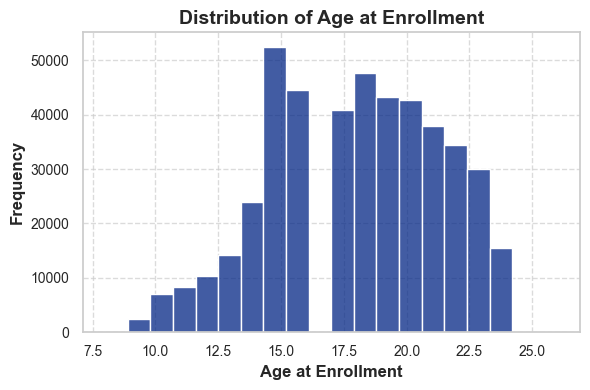

In [123]:
# 4. Histogram for 'age_at_enrollment'
plt.figure(figsize=(6,4))
sns.histplot(clean_df['age_at_enrollment'], bins=20)
plt.xlabel("Age at Enrollment")
plt.ylabel("Frequency")
plt.title("Distribution of Age at Enrollment")
plt.tight_layout()
plt.show()

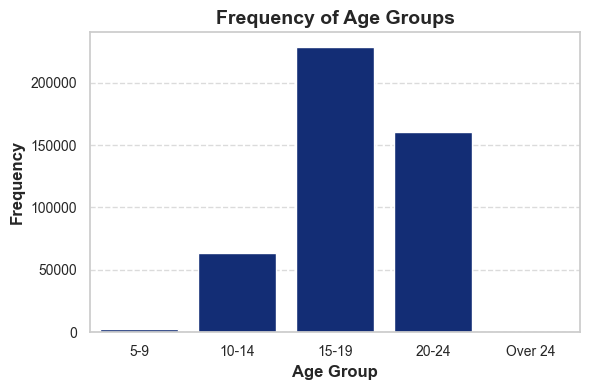

In [124]:
# 5. Bar Chart for Age Groups
plt.figure(figsize=(6,4))
age_group_counts = clean_df['age_group'].value_counts().sort_index().reset_index()
age_group_counts.columns = ['age_group', 'Frequency']
sns.barplot(data= age_group_counts, x ='age_group', y ='Frequency')
plt.xlabel("Age Group",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.title("Frequency of Age Groups",fontsize=14,fontweight="bold")
plt.tight_layout()
plt.show()

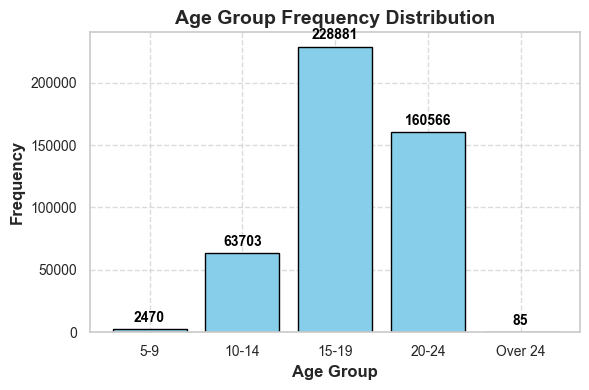

In [125]:
 #Create a figure and axis with an appropriate size for presentations
fig, ax = plt.subplots(figsize=(6, 4))

age_group_counts = clean_df['age_group'].value_counts().sort_index().reset_index()
age_group_counts.columns = ['age_group', 'Frequency']

# Plot the bar chart using the computed age group frequencies
bars = ax.bar(age_group_counts['age_group'], age_group_counts['Frequency'],
              color='skyblue', edgecolor='black')


# Add data labels above each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}', 
                xy=(bar.get_x() + bar.get_width() / 2, height),  # position at the center-top of the bar
                xytext=(0, 3),  # vertical offset for the label
                textcoords="offset points",
                ha='center', va='bottom', 
                fontsize=10, fontweight='bold', color='black')

# Enhance the aesthetics for a presentation
ax.set_title("Age Group Frequency Distribution", fontsize=14, fontweight='bold')
ax.set_xlabel("Age Group", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ensure the layout fits well into the figure area
plt.tight_layout()

# Display the graph
plt.show()

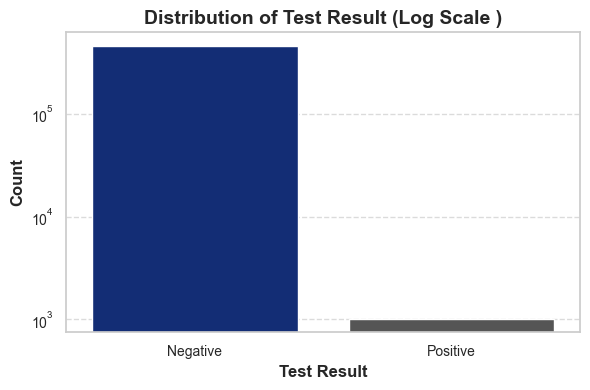

In [126]:
# Distribution of the target variable 'result'
plt.figure(figsize=(6,4))
sns.countplot(data= clean_df, x ='result', hue='result')
plt.yscale('log')

plt.title("Distribution of Test Result (Log Scale )")
plt.xlabel("Test Result")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

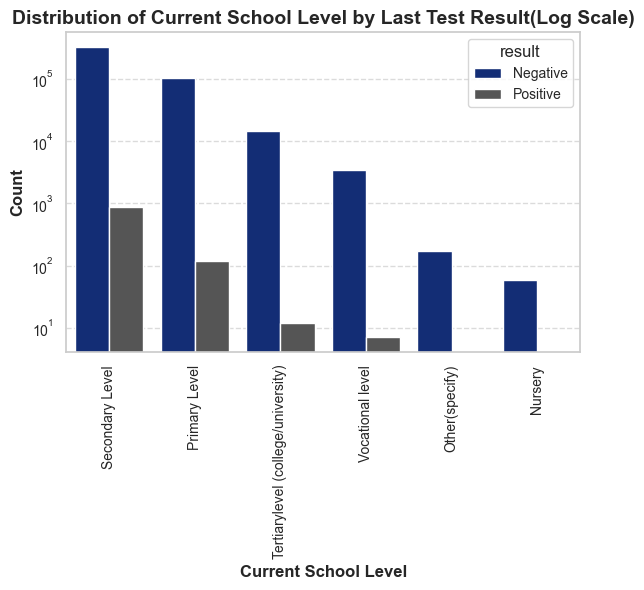

In [127]:
#Countplot for another categorical variable (e.g., current_school_level) split by Last Test Result
plt.figure(figsize=(6,6))
ax = sns.countplot(data=clean_df, x='current_school_level', hue='result')
    
# Apply logarithmic scale to the y-axis to better visualize smaller counts
plt.yscale('log')

plt.title("Distribution of Current School Level by Last Test Result(Log Scale)")
plt.xlabel("Current School Level")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Bivariate analysis

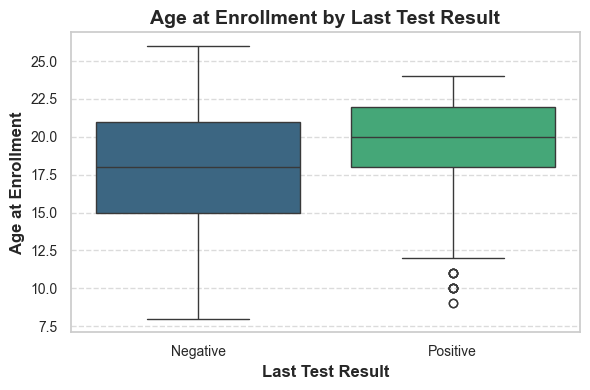

In [128]:
#Boxplot: Age at Enrollment by Last Test Result
plt.figure(figsize=(6,4))
sns.boxplot(data=clean_df, x='result', y='age_at_enrollment', palette='viridis')
plt.title("Age at Enrollment by Last Test Result")
plt.xlabel("Last Test Result")
plt.ylabel("Age at Enrollment")
plt.tight_layout()
plt.show()

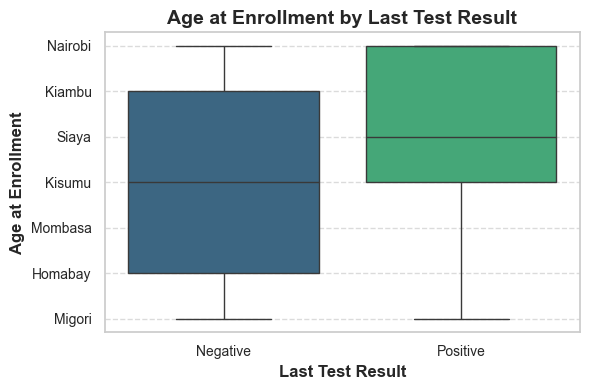

In [129]:
#Boxplot: Age at Enrollment by Last Test Result
plt.figure(figsize=(6,4))
sns.boxplot(data=clean_df, x='result', y='county', palette= 'viridis')
plt.title("Age at Enrollment by Last Test Result")
plt.xlabel("Last Test Result")
plt.ylabel("Age at Enrollment")
plt.tight_layout()
plt.show()

Incidence of HIV status by counties

County Incidence Data:
    county   total  positive  percentage
0  Homabay   79928        88    0.110099
1   Kiambu   21126        50    0.236675
2   Kisumu   82892        95    0.114607
3   Migori   69829       106    0.151799
4  Mombasa   31877        28    0.087838
5  Nairobi  109651       336    0.306427
6    Siaya   60402       316    0.523161


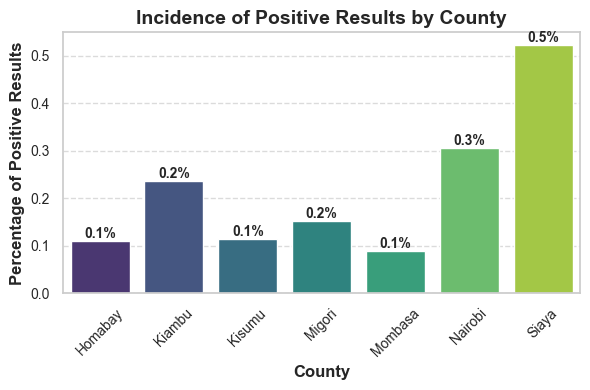

In [130]:
# Total count per county
county_total =clean_df.groupby('county').size().reset_index(name='total')

# Count of positive results per county (assuming the positive value is "Positive")
county_positive = clean_df[clean_df['result'] == 'Positive'].groupby('county').size().reset_index(name='positive')

# Merge the totals with the positive counts
county_incidence = pd.merge(county_total, county_positive, on='county', how='left')
county_incidence['positive'].fillna(0, inplace=True)  # Replace missing positives with 0
county_incidence['percentage'] = (county_incidence['positive'] / county_incidence['total']) * 100

# Display the computed incidence data (optional)
print("County Incidence Data:")
print(county_incidence)

# Plot the incidence percentage for each county
plt.figure(figsize=(6, 4))
ax= sns.barplot(data=county_incidence, x='county', y='percentage', palette='viridis')
plt.title("Incidence of Positive Results by County")
plt.xlabel("County")
plt.ylabel("Percentage of Positive Results")
plt.xticks(rotation=45)
#Add data labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0., f'{height:.1f}%', 
            ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

Age Group Incidence Data:
  age_group   total  positive  percentage
0       5-9    2470         2    0.080972
1     10-14   63703        55    0.086338
2     15-19  228881       362    0.158161
3     20-24  160566       600    0.373678
4   Over 24      85         0    0.000000


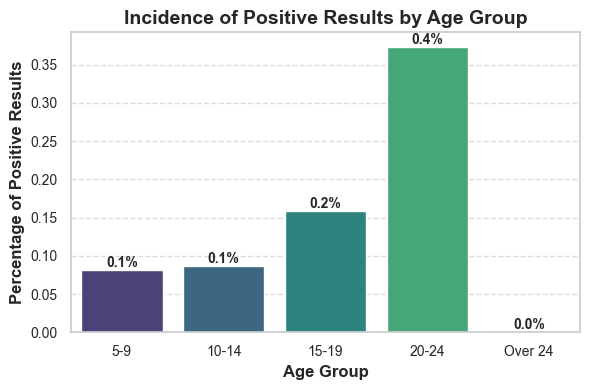

In [131]:
# Total count per age group
age_total = clean_df.groupby('age_group').size().reset_index(name='total')

# Count of positive results per age group
age_positive_results = clean_df[clean_df['result'] == 'Positive'].groupby('age_group').size().reset_index(name='positive')

# Merge the totals with the positive counts
age_incidence = pd.merge(age_total, age_positive_results, on='age_group', how='left')
age_incidence['positive'].fillna(0, inplace=True)
age_incidence['percentage'] = (age_incidence['positive'] / age_incidence['total']) * 100

# Display the computed incidence data (optional)
print("Age Group Incidence Data:")
print(age_incidence)

# Plot the incidence percentage for each age group
plt.figure(figsize=(6,4))
ax=sns.barplot(data=age_incidence, x='age_group', y='percentage', palette='viridis')
plt.title("Incidence of Positive Results by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Percentage of Positive Results")
#Add data labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0., f'{height:.1f}%', 
            ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Define the categorical list for bivariate ana;ysis 
cat_columns = ['county', 'head_of_household', 'father_alive', 'mother_alive',
       'are_both_parents_alive', 'is_one_parent_alive', 'parents_alive_status',
       'ever_missed_full_day_food_in_4wks', 'currently_in_school',
       'current_school_level', 'current_income_source', 'ever_tested_for_hiv',
       'last_test_result', 'ever_had_sex', 'has_sexual_partner',
       'used_condom_with_last_partner', 'exit_status', 'exit_reason',
       'intervention_name', 'result', 'bio_medical', 'social_protection',
       'behavioral', 'post_gbv_care', 'other_interventions', 'age_group','year']

# Iterate over each variable and perform the chi-square test
for col in cat_columns:
    # Create a contingency table for the current variable vs. the 'result' column
    contingency_table = pd.crosstab(clean_df[col], clean_df['result'])
    
    # Perform the chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Round the results for readability
    chi2_rounded = round(chi2, 2)
    p_value_rounded = round(p_value, 4)
    
    # Print the results
    print(f"Variable: {col}")
    print("Contingency Table:")
    print(contingency_table)
    print("Chi-square test statistic:", chi2_rounded)
    print("p-value:", p_value_rounded)
    print("-" * 60)
    print("-" * 60)


Variable: county
Contingency Table:
result   Negative  Positive
county                     
Homabay     79840        88
Kiambu      21076        50
Kisumu      82797        95
Migori      69723       106
Mombasa     31849        28
Nairobi    109315       336
Siaya       60086       316
Chi-square test statistic: 409.58
p-value: 0.0
------------------------------------------------------------
------------------------------------------------------------
Variable: head_of_household
Contingency Table:
result             Negative  Positive
head_of_household                    
Father               182388       289
Grandparents          18062        24
Husband/Partner       64870       286
Mother               127444       240
Other/Specify          5662        13
Self                  23819        72
Sibling               10998        42
Uncle/Aunt            21443        53
Chi-square test statistic: 203.58
p-value: 0.0
------------------------------------------------------------
--------

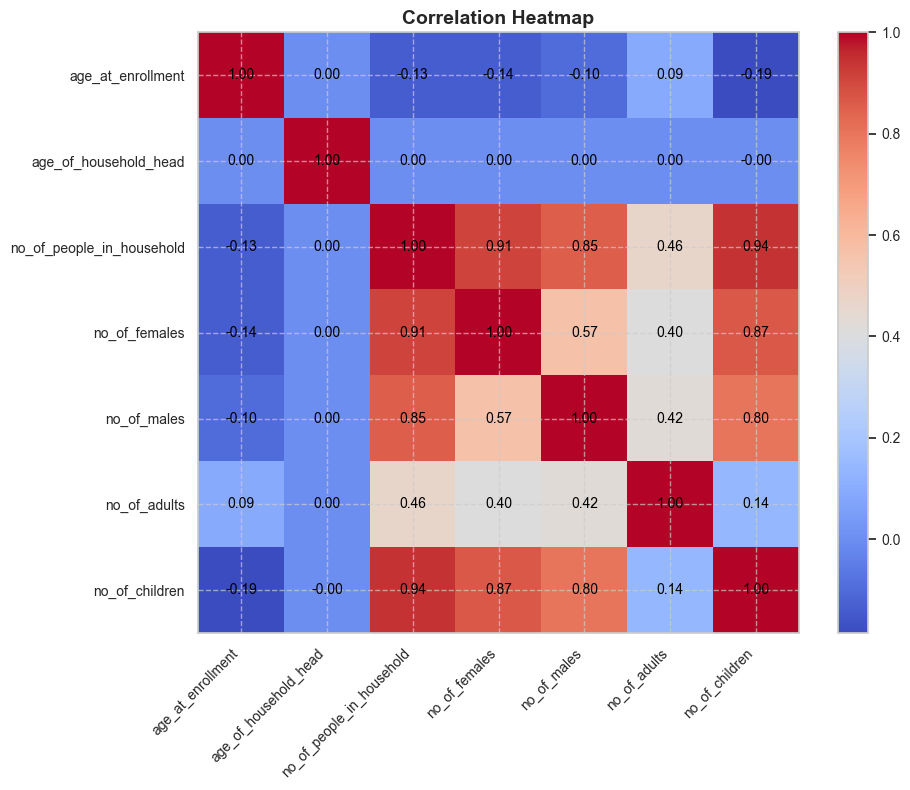

In [133]:
# Correlation Heatmap for Selected Numerical Variables
num_vars = ['age_at_enrollment', 'age_of_household_head', 'no_of_people_in_household', 
            'no_of_females', 'no_of_males', 'no_of_adults', 'no_of_children']

corr_matrix = clean_df[num_vars].corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(num_vars)), num_vars, rotation=45, ha="right")
plt.yticks(range(len(num_vars)), num_vars)
plt.title("Correlation Heatmap")
# Annotate the correlation coefficients on the heatmap
for i in range(len(num_vars)):
    for j in range(len(num_vars)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black")
plt.tight_layout()
plt.show()



## Modelling

In [134]:
# Make a working copy and drop records with missing target values
df_model = clean_df.copy()

# Define feature lists
numerical_features = ['age_of_household_head', 'no_of_people_in_household', 'no_of_females',
                      'no_of_males', 'no_of_adults', 'no_of_children',
                      'age_at_first_sexual_encounter', 'exit_age', 'year','age_at_enrollment']
categorical_features = ['county', 'head_of_household', 'father_alive', 'mother_alive',
                        'are_both_parents_alive', 'is_one_parent_alive', 'parents_alive_status',
                        'ever_missed_full_day_food_in_4wks', 'currently_in_school',
                        'current_school_level', 'current_income_source', 'ever_had_sex', 'has_sexual_partner',
                        'used_condom_with_last_partner', 'exit_status', 'exit_reason','bio_medical', 'social_protection',
                        'behavioral', 'post_gbv_care', 'other_interventions']

target = 'result'

# Encode target variable: assume "Positive" indicates a positive result
df_model[target] = df_model[target].apply(lambda x: 1 if str(x).strip().lower() == 'positive' else 0)
#one hot encode categorical features 
df_model1 = pd.get_dummies(df_model,columns=categorical_features,drop_first=True)

# Separate predictors and target
onehot_cols = [col for col in df_model.columns if col.startswith('county_') or col.startswith('age_group_')]
X = df_model1[numerical_features + onehot_cols]
y = df_model[target]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.2, random_state=42, stratify =y
)



In [135]:
print(y.value_counts())

result
0    454686
1      1019
Name: count, dtype: int64


BASE MODEL: LOGISTIC REGRESSION

In [136]:
# Create and train a basic Logistic Regression model using default settings.
base_model = LogisticRegression(max_iter=1000, random_state=42)
base_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [137]:
# Predict on test data
y_pred = base_model.predict(X_test)

In [138]:
# Evaluation
print("=== Base Logistic Regression Model Performance ===")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

=== Base Logistic Regression Model Performance ===


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90937
           1       0.00      0.00      0.00       204

    accuracy                           1.00     91141
   macro avg       0.50      0.50      0.50     91141
weighted avg       1.00      1.00      1.00     91141

Confusion Matrix:
[[90937     0]
 [  204     0]]


#### SMOTE ( oversampling minority class )

In [139]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
model_smote = LogisticRegression(max_iter =1000, random_state = 42)
model_smote.fit(X_train_smote, y_train_smote)
y_predict_smote = model_smote.predict(X_test) 

print("=== SMOTE Logistic Regression Model Performance ===")
print(classification_report(y_test,y_predict_smote))
print("confusion matrix:\n", confusion_matrix(y_test,y_predict_smote))

=== SMOTE Logistic Regression Model Performance ===
              precision    recall  f1-score   support

           0       1.00      0.68      0.81     90937
           1       0.00      0.59      0.01       204

    accuracy                           0.68     91141
   macro avg       0.50      0.63      0.41     91141
weighted avg       1.00      0.68      0.80     91141

confusion matrix:
 [[61425 29512]
 [   84   120]]


### Matching by undersampling 

In [140]:
rus = RandomUnderSampler(random_state=42)
X_train_undersampler, y_train_undersampler = rus.fit_resample(X_train,y_train) 
model_undersampler = LogisticRegression (max_iter=1000,random_state=42)
model_undersampler.fit(X_train_undersampler ,y_train_undersampler)
y_pred_undersampler = model_undersampler.predict(X_test) 
print(classification_report(y_test,y_pred_undersampler))
print(confusion_matrix(y_test,y_pred_undersampler))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80     90937
           1       0.00      0.60      0.01       204

    accuracy                           0.67     91141
   macro avg       0.50      0.64      0.41     91141
weighted avg       1.00      0.67      0.80     91141

[[61170 29767]
 [   81   123]]


### Class -weight adjustments 

In [141]:
model_balanced = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model_balanced.fit(X_train, y_train)
y_pred_balanced = model_balanced.predict(X_test)
print(classification_report(y_test, y_pred_balanced))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81     90937
           1       0.00      0.60      0.01       204

    accuracy                           0.68     91141
   macro avg       0.50      0.64      0.41     91141
weighted avg       1.00      0.68      0.81     91141

Confusion Matrix:
 [[61950 28987]
 [   81   123]]


In [142]:
model_balanced = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model_balanced.fit(X_train, y_train)
y_pred_balanced = model_balanced.predict(X_test)
print(classification_report(y_test, y_pred_balanced))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81     90937
           1       0.00      0.60      0.01       204

    accuracy                           0.68     91141
   macro avg       0.50      0.64      0.41     91141
weighted avg       1.00      0.68      0.81     91141

Confusion Matrix:
 [[61950 28987]
 [   81   123]]


### Using Pipelines 

In [143]:
# Encode target variable: assume "Positive" indicates a positive result
df_model[target] = df_model[target].apply(lambda x: 1 if str(x).strip().lower() == 'positive' else 0)

In [144]:
clean_df = AGYW_prev_data

In [145]:
clean_df.head()

,date_of_birth,date_of_enrollment,county,head_of_household,head_of_household_other,age_of_household_head,father_alive,mother_alive,are_both_parents_alive,is_one_parent_alive,...,social_protection,behavioral,post_gbv_care,other_interventions,exit_age,exit_reason_other,duration,year,age_at_enrollment,age_group
0,2004-09-16,2020-02-22,Nairobi,Mother,Guardian,58.0,yes,yes,Yes,No,...,yes,yes,no,no,20.0,Graduated,168.0,2020.0,15.0,15-19
1,2004-08-02,2019-12-18,Nairobi,Father,Guardian,43.0,yes,yes,Yes,No,...,yes,yes,no,no,20.0,Graduated,131.0,2019.0,15.0,15-19
2,2005-10-20,2020-03-07,Nairobi,Mother,Guardian,41.0,no,yes,No,Yes,...,yes,no,no,no,20.0,Graduated,158.0,2020.0,14.0,10-14
3,2006-01-18,2020-03-03,Nairobi,Mother,Guardian,45.0,no,yes,No,Yes,...,yes,yes,no,no,20.0,Graduated,162.0,2020.0,14.0,10-14
4,2004-03-22,2019-12-18,Nairobi,Father,Guardian,42.0,yes,yes,Yes,No,...,yes,yes,no,no,20.0,Graduated,131.0,2019.0,15.0,15-19


In [146]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 455705 entries, 0 to 455806
Data columns (total 46 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   date_of_birth                      455705 non-null  datetime64[ns]
 1   date_of_enrollment                 455705 non-null  datetime64[ns]
 2   county                             455705 non-null  object        
 3   head_of_household                  455705 non-null  object        
 4   head_of_household_other            455705 non-null  object        
 5   age_of_household_head              455705 non-null  float64       
 6   father_alive                       455705 non-null  object        
 7   mother_alive                       455705 non-null  object        
 8   are_both_parents_alive             455705 non-null  object        
 9   is_one_parent_alive                455705 non-null  object        
 10  parents_alive_status     

In [147]:
clean_df.isnull().sum()

date_of_birth                        0
date_of_enrollment                   0
county                               0
head_of_household                    0
head_of_household_other              0
age_of_household_head                0
father_alive                         0
mother_alive                         0
are_both_parents_alive               0
is_one_parent_alive                  0
parents_alive_status                 0
no_of_people_in_household            0
no_of_females                        0
no_of_males                          0
no_of_adults                         0
no_of_children                       0
ever_missed_full_day_food_in_4wks    0
no_of_days_missed_food_in_4wks       0
currently_in_school                  0
current_school_level                 0
current_income_source                0
ever_tested_for_hiv                  0
last_test_result                     0
ever_had_sex                         0
age_at_first_sexual_encounter        0
has_sexual_partner       

In [175]:
X = clean_df.drop(['date_of_birth','date_of_enrollment','intervention_name','intervention_date','ever_tested_for_hiv','result','last_test_result'],axis=1)
y = clean_df['result'].map({'Negative':0, 'Positive':1})

In [172]:
#Separate categorical and numerical features
numeric_cols = X.select_dtypes(include=('int64', 'float64')).columns
print(numeric_cols)

Index(['age_of_household_head', 'no_of_people_in_household', 'no_of_females',
       'no_of_males', 'no_of_adults', 'no_of_children',
       'no_of_days_missed_food_in_4wks', 'age_at_first_sexual_encounter',
       'age_of_last_partner', 'exit_age', 'duration', 'year',
       'age_at_enrollment'],
      dtype='object')


In [173]:
categoric_cols = X.select_dtypes(include='object').columns
print(categoric_cols)

Index(['county', 'head_of_household', 'head_of_household_other',
       'father_alive', 'mother_alive', 'are_both_parents_alive',
       'is_one_parent_alive', 'parents_alive_status',
       'ever_missed_full_day_food_in_4wks', 'currently_in_school',
       'current_school_level', 'current_income_source', 'ever_tested_for_hiv',
       'ever_had_sex', 'has_sexual_partner', 'used_condom_with_last_partner',
       'dreams_program', 'dreams_program_other', 'exit_status', 'exit_reason',
       'bio_medical', 'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'exit_reason_other'],
      dtype='object')


In [151]:
clean_df.isnull().sum()

date_of_birth                        0
date_of_enrollment                   0
county                               0
head_of_household                    0
head_of_household_other              0
age_of_household_head                0
father_alive                         0
mother_alive                         0
are_both_parents_alive               0
is_one_parent_alive                  0
parents_alive_status                 0
no_of_people_in_household            0
no_of_females                        0
no_of_males                          0
no_of_adults                         0
no_of_children                       0
ever_missed_full_day_food_in_4wks    0
no_of_days_missed_food_in_4wks       0
currently_in_school                  0
current_school_level                 0
current_income_source                0
ever_tested_for_hiv                  0
last_test_result                     0
ever_had_sex                         0
age_at_first_sexual_encounter        0
has_sexual_partner       

In [152]:
#train and test splits
X_train, X_test, y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [153]:
# This transformer scales numeric features and one-hot encodes categorical features.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categoric_cols)
    ]
)


In [154]:
#Base Logistic Regression Pipeline (No imbalance handling)
pipeline_base = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

In [155]:
lr_model= pipeline_base

In [156]:
lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age_of_household_head', 'no_of_people_in_household', 'no_of_females',
       'no_of_males', 'no_of_adults', 'no_of_children',
       'no_of_days_missed_food_in_4wks', 'age_at_first_sexual_encounter',
       'age_of_last_partner', 'exit_age', 'duration', 'year',
       'age_at_enrollment'],
      dtyp...
       'current_school_level', 'current_income_source', 'ever_had_sex',
       'has_sexual_partner', 'used_condom_with_last_partner', 'dreams_program',
       'dreams_program_other', 'exit_status', 'exit_reason', 'bio_medical',
       'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'exit_reason_other'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [157]:
#Make predictions
y_pred = lr_model.predict(X_test)

In [158]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.2f}%')
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

Accuracy: 99.79%
Precision: 0.00%
Recall: 0.00%
F1 Score: 0.00%


Pipeline with SMOTE  

In [159]:
pipeline_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])


In [160]:
# fit and predict 
lr_model_smote= pipeline_smote
lr_model_smote.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age_of_household_head', 'no_of_people_in_household', 'no_of_females',
       'no_of_males', 'no_of_adults', 'no_of_children',
       'no_of_days_missed_food_in_4wks', 'age_at_first_sexual_encounter',
       'age_of_last_partner', 'exit_age', 'duration', 'year',
       'age_at_enrollment'],
      dtyp...
       'current_school_level', 'current_income_source', 'ever_had_sex',
       'has_sexual_partner', 'used_condom_with_last_partner', 'dreams_program',
       'dreams_program_other', 'exit_status', 'exit_reason', 'bio_medical',
       'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'exit_reason_other'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [161]:
y_pred_smote = lr_model_smote.predict(X_test)

In [162]:
# model evaluation 
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.2f}%')
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

Accuracy: 99.79%
Precision: 0.00%
Recall: 0.00%
F1 Score: 0.00%


Pipeline with undersampling 


In [163]:
# Build pipeline with undersampling:
pipeline_under = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

In [164]:
# Fit model 
pipeline_under.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age_of_household_head', 'no_of_people_in_household', 'no_of_females',
       'no_of_males', 'no_of_adults', 'no_of_children',
       'no_of_days_missed_food_in_4wks', 'age_at_first_sexual_encounter',
       'age_of_last_partner', 'exit_age', 'duration', 'year',
       'age_at_enrollment'],
      dtyp...
       'has_sexual_partner', 'used_condom_with_last_partner', 'dreams_program',
       'dreams_program_other', 'exit_status', 'exit_reason', 'bio_medical',
       'social_protection', 'behavioral', 'post_gbv_care',
       'other_interventions', 'exit_reason_other'],
      dtype='object'))])),
                ('undersample', RandomUnderSampler(random_state=42)),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [165]:
# Predict using the undersampling pipeline
y_pred_under = pipeline_under.predict(X_test)

In [166]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("=== Logistic Regression with Undersampling ===")
print(classification_report(y_test, y_pred_under))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_under))
print(f'Accuracy: {accuracy*100:.2f}%')
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

=== Logistic Regression with Undersampling ===
              precision    recall  f1-score   support

           0       1.00      0.72      0.84     90948
           1       0.01      0.76      0.01       193

    accuracy                           0.72     91141
   macro avg       0.50      0.74      0.43     91141
weighted avg       1.00      0.72      0.84     91141

Confusion Matrix:
 [[65893 25055]
 [   46   147]]
Accuracy: 99.79%
Precision: 0.00%
Recall: 0.00%
F1 Score: 0.00%


Random tree classifier 

In [167]:
#create a column transformer 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [168]:
# Pipeline of random forest with udersampling 

In [169]:
pipeline_rf_under = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])